In [1]:
import os
os.getcwd()

'C:\\Users\\Lenovo\\Desktop\\27th Nov - Stats and ML Batch\\DecisionTree'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
dataset = pd.read_csv('50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
# Data Preprocessing
### 1) Handling missing value
### 2) Handling outlier - Outlier only required when we have large tree to avoid overfitting
### 3) Encoding - in tree based model, always use label encoder method
### 4) Feature Scaling - please note, there is no need to do feature scaling in DT

In [5]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
dataset['State'] = dataset['State'].astype('category')
dataset['State'] = dataset['State'].cat.codes
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [8]:
# split the data into ind and dep variable
x = dataset.iloc[:,0:-1]
y = dataset[['Profit']]

In [9]:
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [10]:
y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [11]:
# splitting the data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

# Building DecisionTree Regressor Model

In [12]:
from sklearn.tree import DecisionTreeRegressor
dtregressor = DecisionTreeRegressor()
dtregressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [13]:
# Predict test data with dtregressor model
y_pred_train = dtregressor.predict(x_train)
y_pred_test = dtregressor.predict(x_test)

In [14]:
# Evaluate your model
from sklearn.metrics import r2_score

In [15]:
print("Training Accuracy :", r2_score(y_train, y_pred_train))
print()
print("Test Accuracy :", r2_score(y_test, y_pred_test))

Training Accuracy : 1.0

Test Accuracy : 0.8927544116270677


In [16]:
# Using cross validation method (K-Fold Mothod)
from sklearn.model_selection import cross_val_score
Trainging_accuracy = cross_val_score(dtregressor, x_train, y_train, cv=10)
print(Trainging_accuracy)

[  0.73955568   0.82069174   0.60919183   0.87001128   0.97493126
   0.26438253   0.92993926   0.58174515 -21.22435468   0.92614543]


In [17]:
Trainging_accuracy.mean()

-1.4507760508866203

# Linear Regression Model

In [18]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train, y_train)

LinearRegression()

In [19]:
# Predict test data with linear model
y_pred_train_lr = linear.predict(x_train)
y_pred_test_lr = linear.predict(x_test)

In [20]:
print("Training Accuracy :", r2_score(y_train, y_pred_train_lr))
print()
print("Test Accuracy :", r2_score(y_test, y_pred_test_lr))

Training Accuracy : 0.9419507593691141

Test Accuracy : 0.9616053937220065


# RandomForestRegressor Model

In [21]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=500)
rf_regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=500)

In [22]:
# Predict test data with linear model
y_pred_train_rf = rf_regressor.predict(x_train)
y_pred_test_rf = rf_regressor.predict(x_test)

In [23]:
print("Training Accuracy :", r2_score(y_train, y_pred_train_rf))
print()
print("Test Accuracy :", r2_score(y_test, y_pred_test_rf))

Training Accuracy : 0.9861370105784566

Test Accuracy : 0.9396035645008534


# Classification Problem

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [25]:
df = pd.read_csv('penguins_lter.csv')
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/2007,39.1,18.7,181,.,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/2007,39.5,17.4,186,3800,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/2007,40.3,18.0,.,3250,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/2007,36.7,19.3,193,3450,FEMALE,8.76651,-25.32426,NaN


In [26]:
df.shape

(344, 17)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    object 
 12  Body Mass (g)        342 non-null    object 
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [28]:
df.head(2)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/2007,39.1,18.7,181,.,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/2007,39.5,17.4,186,3800,FEMALE,8.94956,-24.69454,NaN


In [29]:
df.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')

In [30]:
# Pre-prunning approach
df.drop(['studyName','Sample Number','Individual ID','Date Egg','Comments'], axis=1,inplace=True)

In [31]:
df.head()

,Species,Region,Island,Stage,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,39.1,18.7,181,.,MALE,NaN,NaN
1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,39.5,17.4,186,3800,FEMALE,8.94956,-24.69454
2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,40.3,18.0,.,3250,FEMALE,8.36821,-25.33302
3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,36.7,19.3,193,3450,FEMALE,8.76651,-25.32426


In [32]:
df.shape

(344, 12)

In [33]:
# Data Preprocessing
df.isnull().sum()

Species                 0
Region                  0
Island                  0
Stage                   0
Clutch Completion       0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64

In [34]:
df.isnull().sum()/len(df)*100

Species                0.000000
Region                 0.000000
Island                 0.000000
Stage                  0.000000
Clutch Completion      0.000000
Culmen Length (mm)     0.581395
Culmen Depth (mm)      0.581395
Flipper Length (mm)    0.581395
Body Mass (g)          0.581395
Sex                    2.906977
Delta 15 N (o/oo)      4.069767
Delta 13 C (o/oo)      3.779070
dtype: float64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Region               344 non-null    object 
 2   Island               344 non-null    object 
 3   Stage                344 non-null    object 
 4   Clutch Completion    344 non-null    object 
 5   Culmen Length (mm)   342 non-null    float64
 6   Culmen Depth (mm)    342 non-null    float64
 7   Flipper Length (mm)  342 non-null    object 
 8   Body Mass (g)        342 non-null    object 
 9   Sex                  334 non-null    object 
 10  Delta 15 N (o/oo)    330 non-null    float64
 11  Delta 13 C (o/oo)    331 non-null    float64
dtypes: float64(4), object(8)
memory usage: 32.4+ KB


In [36]:
df['Species'].value_counts()

Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64

In [37]:
# Finding the unique values in the given dataset
for i in df.columns:
    print("*********************************************", i ,
         "******************************************************")
    print()
    print(set(df[i].tolist()))
    print()

********************************************* Species ******************************************************

{'Gentoo penguin (Pygoscelis papua)', 'Chinstrap penguin (Pygoscelis antarctica)', 'Adelie Penguin (Pygoscelis adeliae)'}

********************************************* Region ******************************************************

{'Anvers'}

********************************************* Island ******************************************************

{'Dream', 'Biscoe', 'Torgersen'}

********************************************* Stage ******************************************************

{'Adult, 1 Egg Stage'}

********************************************* Clutch Completion ******************************************************

{'No', 'Yes'}

********************************************* Culmen Length (mm) ******************************************************

{nan, nan, 49.4, 49.9, 37.3, 45.7, 50.4, 32.1, 33.1, 33.5, 35.6, 36.2, 35.7, 38.1, 35.2, 40.2, 41.5, 34.1, 34.6, 36

In [38]:
df['Flipper Length (mm)'].mode()

0    190
Name: Flipper Length (mm), dtype: object

In [39]:
df['Flipper Length (mm)'] = np.where(df['Flipper Length (mm)']=='.','190', 
                                     df['Flipper Length (mm)'])

In [40]:
df['Body Mass (g)'].mode()

0    3800
Name: Body Mass (g), dtype: object

In [41]:
df['Body Mass (g)'] = np.where(df['Body Mass (g)']=='.','3800',
                              df['Body Mass (g)'])

In [42]:
df['Sex'].mode()

0    MALE
Name: Sex, dtype: object

In [43]:
df['Sex'] = np.where(df['Sex']=='.','MALE', df['Sex'])

In [44]:
# Finding the unique values in the given dataset
for i in df.columns:
    print("*********************************************", i ,
         "******************************************************")
    print()
    print(set(df[i].tolist()))
    print()

********************************************* Species ******************************************************

{'Gentoo penguin (Pygoscelis papua)', 'Chinstrap penguin (Pygoscelis antarctica)', 'Adelie Penguin (Pygoscelis adeliae)'}

********************************************* Region ******************************************************

{'Anvers'}

********************************************* Island ******************************************************

{'Dream', 'Biscoe', 'Torgersen'}

********************************************* Stage ******************************************************

{'Adult, 1 Egg Stage'}

********************************************* Clutch Completion ******************************************************

{'No', 'Yes'}

********************************************* Culmen Length (mm) ******************************************************

{nan, nan, 49.4, 49.9, 37.3, 45.7, 50.4, 32.1, 33.1, 33.5, 35.6, 36.2, 35.7, 38.1, 35.2, 40.2, 41.5, 34.1, 34.6, 36

In [45]:
df['Flipper Length (mm)'] = pd.to_numeric(df['Flipper Length (mm)'])

In [46]:
df['Body Mass (g)'] = pd.to_numeric(df['Body Mass (g)'])

In [47]:
df.isnull().sum()

Species                 0
Region                  0
Island                  0
Stage                   0
Clutch Completion       0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Region               344 non-null    object 
 2   Island               344 non-null    object 
 3   Stage                344 non-null    object 
 4   Clutch Completion    344 non-null    object 
 5   Culmen Length (mm)   342 non-null    float64
 6   Culmen Depth (mm)    342 non-null    float64
 7   Flipper Length (mm)  342 non-null    float64
 8   Body Mass (g)        342 non-null    float64
 9   Sex                  334 non-null    object 
 10  Delta 15 N (o/oo)    330 non-null    float64
 11  Delta 13 C (o/oo)    331 non-null    float64
dtypes: float64(6), object(6)
memory usage: 32.4+ KB


In [49]:
df.columns

Index(['Species', 'Region', 'Island', 'Stage', 'Clutch Completion',
       'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'],
      dtype='object')

In [50]:
#'Culmen Length (mm)','Culmen Depth (mm)', 'Flipper Length (mm)','Body Mass (g)'
# 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)' - numerical columns
       
#'Sex' - char

In [51]:
df['Sex'].value_counts()

MALE      169
FEMALE    165
Name: Sex, dtype: int64

In [52]:
df['Sex'] = df['Sex'].fillna('MALE')

In [53]:
df.head(1)

,Species,Region,Island,Stage,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,39.1,18.7,181.0,3800.0,MALE,NaN,NaN


In [54]:
numerical = ['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)','Delta 15 N (o/oo)','Delta 13 C (o/oo)']
categorical = ['Species','Region','Island','Stage','Clutch Completion','Sex']

In [55]:
numerical

['Culmen Length (mm)',
 'Culmen Depth (mm)',
 'Flipper Length (mm)',
 'Body Mass (g)',
 'Delta 15 N (o/oo)',
 'Delta 13 C (o/oo)']

In [56]:
categorical

['Species', 'Region', 'Island', 'Stage', 'Clutch Completion', 'Sex']

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Region               344 non-null    object 
 2   Island               344 non-null    object 
 3   Stage                344 non-null    object 
 4   Clutch Completion    344 non-null    object 
 5   Culmen Length (mm)   342 non-null    float64
 6   Culmen Depth (mm)    342 non-null    float64
 7   Flipper Length (mm)  342 non-null    float64
 8   Body Mass (g)        342 non-null    float64
 9   Sex                  344 non-null    object 
 10  Delta 15 N (o/oo)    330 non-null    float64
 11  Delta 13 C (o/oo)    331 non-null    float64
dtypes: float64(6), object(6)
memory usage: 32.4+ KB


In [58]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=np.nan, strategy='median')
df[numerical] = impute.fit_transform(df[numerical])


"""
# Char imputation by using "Mode" concept
impute = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df[categorical] = impute.fit_transform(df[numerical])

"""

'\n# Char imputation by using "Mode" concept\nimpute = SimpleImputer(missing_values=np.nan, strategy=\'most_frequent\')\ndf[categorical] = impute.fit_transform(df[numerical])\n\n'

In [59]:
df.isnull().sum()

Species                0
Region                 0
Island                 0
Stage                  0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
dtype: int64

In [60]:
# preprocessing part 2 - encoding
df.head()

,Species,Region,Island,Stage,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,39.10,18.7,181.0,3800.0,MALE,8.652405,-25.83352
1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,39.50,17.4,186.0,3800.0,FEMALE,8.949560,-24.69454
2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,40.30,18.0,190.0,3250.0,FEMALE,8.368210,-25.33302
3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,44.45,17.3,197.0,4050.0,MALE,8.652405,-25.83352
4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,36.70,19.3,193.0,3450.0,FEMALE,8.766510,-25.32426


In [61]:
df[categorical].shape

(344, 6)

In [62]:
df.head()

,Species,Region,Island,Stage,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,39.10,18.7,181.0,3800.0,MALE,8.652405,-25.83352
1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,39.50,17.4,186.0,3800.0,FEMALE,8.949560,-24.69454
2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,40.30,18.0,190.0,3250.0,FEMALE,8.368210,-25.33302
3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,44.45,17.3,197.0,4050.0,MALE,8.652405,-25.83352
4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,36.70,19.3,193.0,3450.0,FEMALE,8.766510,-25.32426


In [63]:
df.columns

Index(['Species', 'Region', 'Island', 'Stage', 'Clutch Completion',
       'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'],
      dtype='object')

In [64]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])

In [65]:
df['Region'] = encoder.fit_transform(df['Region'])
df['Island'] = encoder.fit_transform(df['Island'])
df['Stage'] = encoder.fit_transform(df['Stage'])
df['Clutch Completion'] = encoder.fit_transform(df['Clutch Completion'])
df['Sex'] = encoder.fit_transform(df['Sex'])

In [66]:
df.head()

,Species,Region,Island,Stage,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,0,0,2,0,1,39.10,18.7,181.0,3800.0,1,8.652405,-25.83352
1,0,0,2,0,1,39.50,17.4,186.0,3800.0,0,8.949560,-24.69454
2,0,0,2,0,1,40.30,18.0,190.0,3250.0,0,8.368210,-25.33302
3,0,0,2,0,1,44.45,17.3,197.0,4050.0,1,8.652405,-25.83352
4,0,0,2,0,1,36.70,19.3,193.0,3450.0,0,8.766510,-25.32426


In [67]:
df['Species'].value_counts()

0    152
2    124
1     68
Name: Species, dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    int32  
 1   Region               344 non-null    int32  
 2   Island               344 non-null    int32  
 3   Stage                344 non-null    int32  
 4   Clutch Completion    344 non-null    int32  
 5   Culmen Length (mm)   344 non-null    float64
 6   Culmen Depth (mm)    344 non-null    float64
 7   Flipper Length (mm)  344 non-null    float64
 8   Body Mass (g)        344 non-null    float64
 9   Sex                  344 non-null    int32  
 10  Delta 15 N (o/oo)    344 non-null    float64
 11  Delta 13 C (o/oo)    344 non-null    float64
dtypes: float64(6), int32(6)
memory usage: 24.3 KB


In [69]:
df.describe()

,Species,Region,Island,Stage,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,344.0,344.000000,344.0,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,0.918605,0.0,0.662791,0.0,0.895349,43.925000,17.152035,200.877907,4201.017442,0.520349,8.730086,-25.691855
std,0.893320,0.0,0.726194,0.0,0.306549,5.443792,1.969060,14.032539,799.618885,0.500313,0.540630,0.779277
min,0.000000,0.0,0.000000,0.0,0.000000,32.100000,13.100000,172.000000,2700.000000,0.000000,7.632200,-27.018540
25%,0.000000,0.0,0.000000,0.0,1.000000,39.275000,15.600000,190.000000,3550.000000,0.000000,8.307415,-26.285460
50%,1.000000,0.0,1.000000,0.0,1.000000,44.450000,17.300000,197.000000,4050.000000,1.000000,8.652405,-25.833520
75%,2.000000,0.0,1.000000,0.0,1.000000,48.500000,18.700000,213.000000,4750.000000,1.000000,9.136170,-25.089467
max,2.000000,0.0,2.000000,0.0,1.000000,59.600000,21.500000,231.000000,6300.000000,1.000000,10.025440,-23.787670


In [70]:
import dtale
dtale.show(df)

<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Culmen Depth (mm)'>

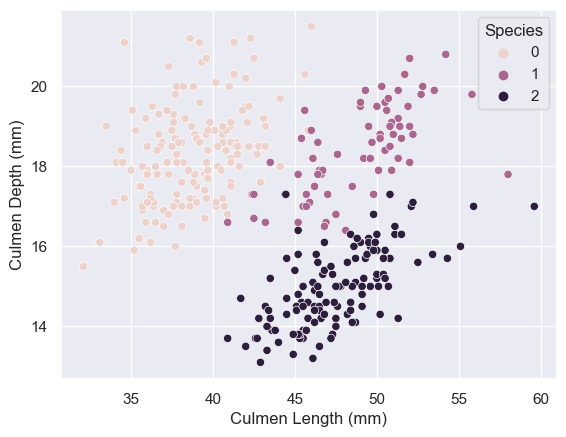

In [71]:
sns.scatterplot(x ='Culmen Length (mm)', y='Culmen Depth (mm)', data=df, hue='Species')

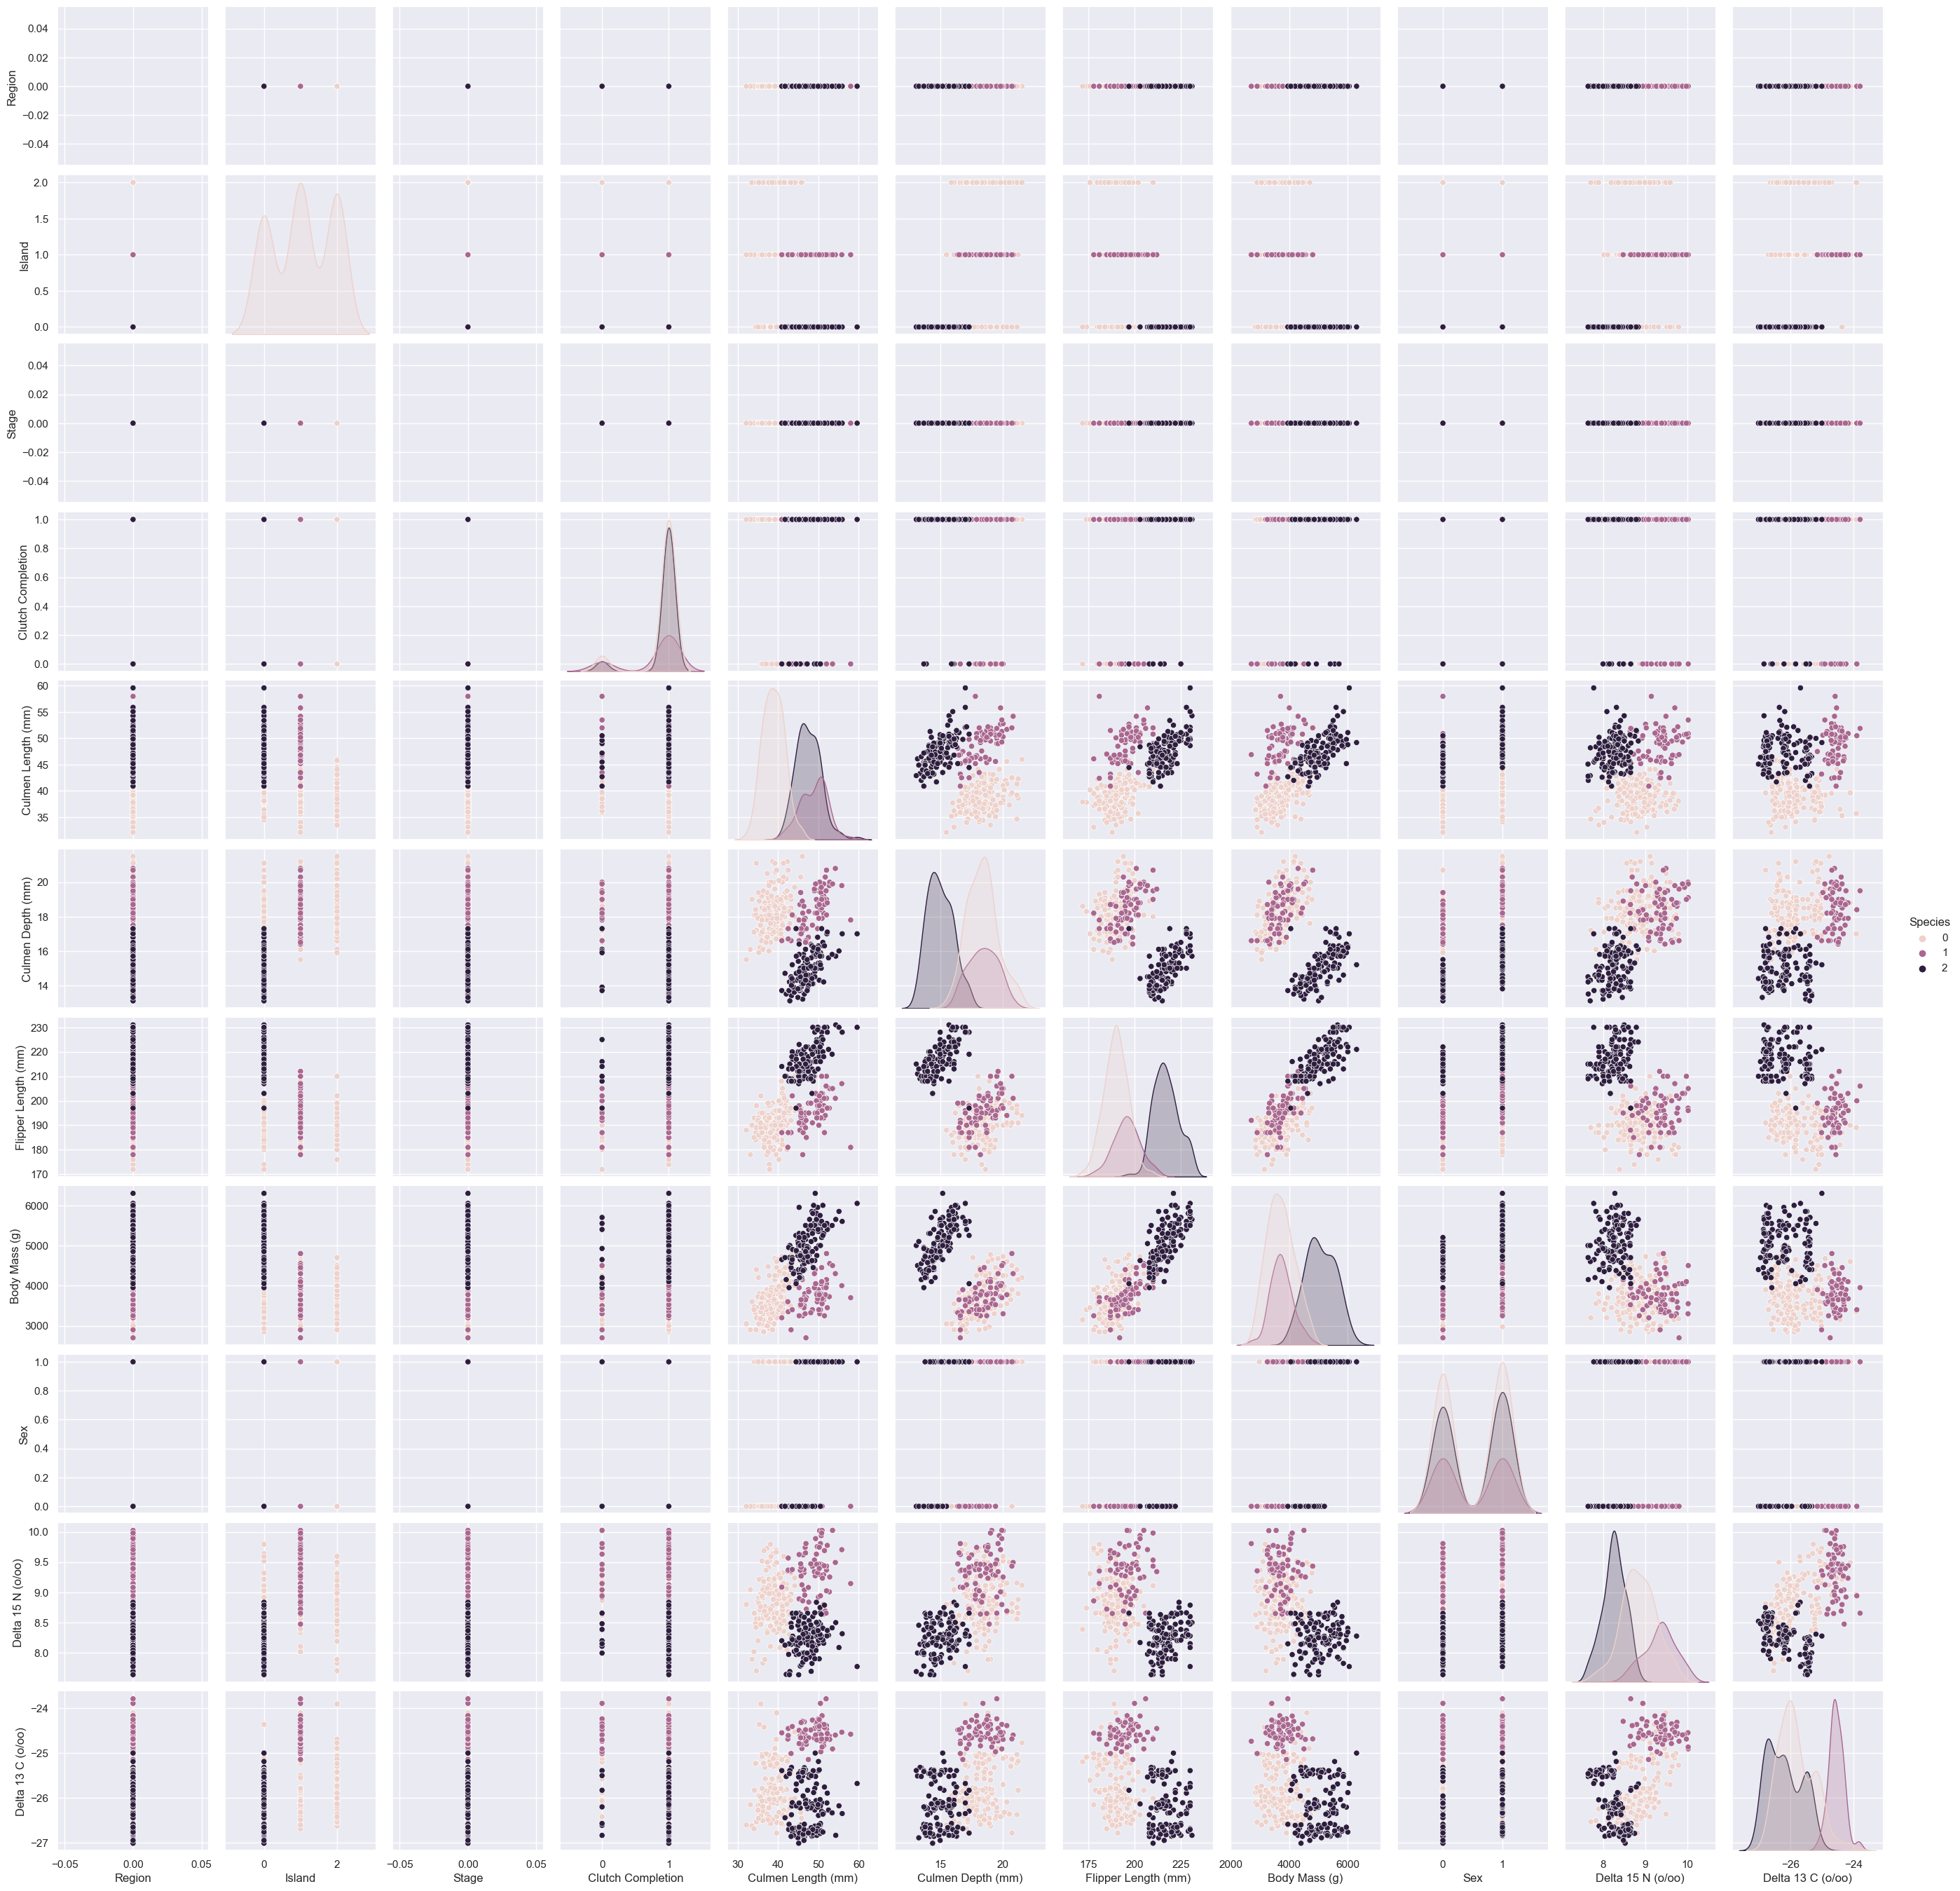

In [72]:
sns.pairplot(data=df, hue='Species')
plt.show()

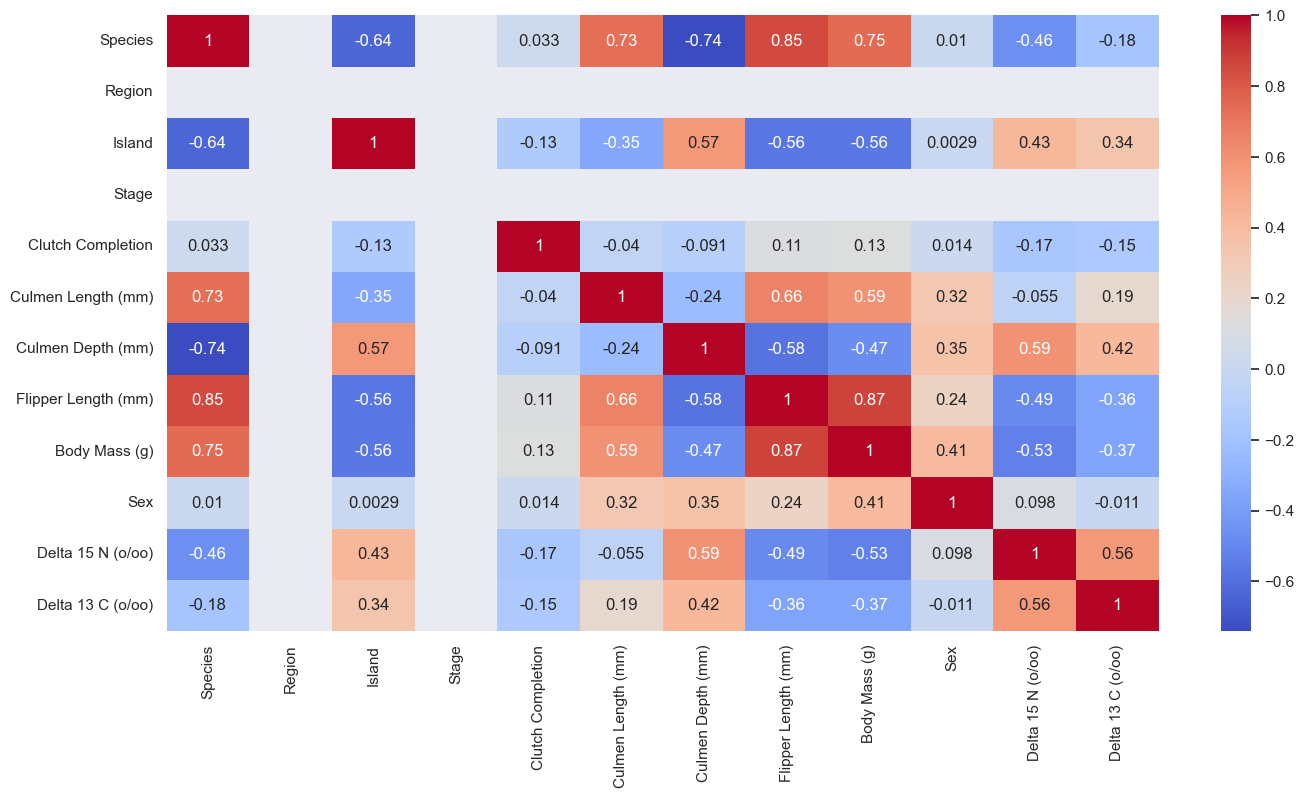

In [73]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

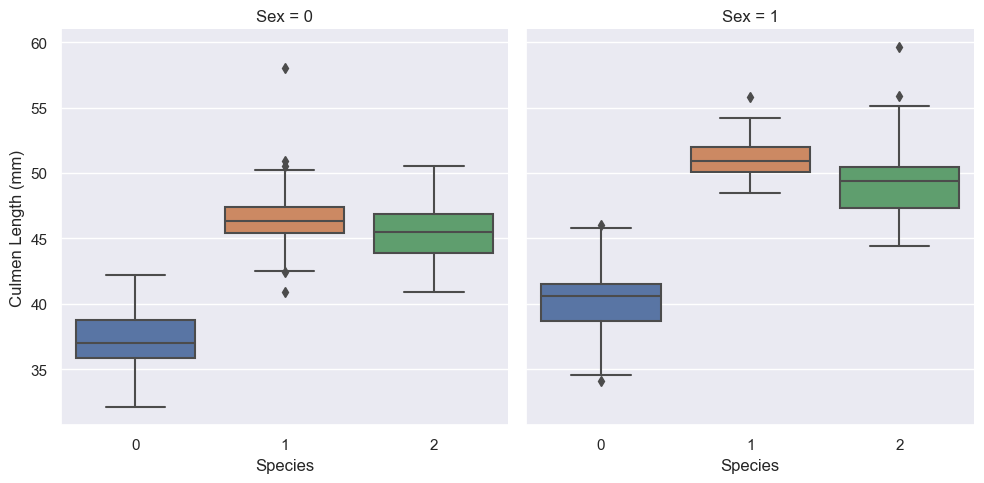

In [74]:
sns.catplot(data=df, x='Species', y='Culmen Length (mm)', kind='box', col='Sex')

In [75]:
# split the data into ind and dep variable
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [76]:
x.head()

,Region,Island,Stage,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,0,2,0,1,39.10,18.7,181.0,3800.0,1,8.652405,-25.83352
1,0,2,0,1,39.50,17.4,186.0,3800.0,0,8.949560,-24.69454
2,0,2,0,1,40.30,18.0,190.0,3250.0,0,8.368210,-25.33302
3,0,2,0,1,44.45,17.3,197.0,4050.0,1,8.652405,-25.83352
4,0,2,0,1,36.70,19.3,193.0,3450.0,0,8.766510,-25.32426


In [77]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

In [78]:
# Imbalance treatement
import imblearn

In [79]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_over, y_over = ros.fit_resample(x,y)
print("Imbalanced datapoint :", y.value_counts())
print()
print("Balanced datapoint :", y_over.value_counts())

Imbalanced datapoint : 0    152
2    124
1     68
Name: Species, dtype: int64

Balanced datapoint : 0    152
1    152
2    152
Name: Species, dtype: int64


In [80]:
152+152+152

456

In [81]:
152/344*100

44.18604651162791

In [82]:
# split the data into training and test for building and prediction purpose

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, train_size=0.75,random_state=42,
                                                   stratify=y_over)

# Building Decision Tree Model

In [83]:
from sklearn.tree import DecisionTreeClassifier
# approach 1 = Gini
dtree1 = DecisionTreeClassifier(criterion='gini')
dtree1.fit(x_train, y_train)

# approach 2 = entropy
dtree2 = DecisionTreeClassifier(criterion='entropy')
dtree2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [84]:
DecisionTreeClassifier(criterion='gini').fit(x_train, y_train)

DecisionTreeClassifier()

# Predict the test data

In [85]:
y_pred_dt1_train = dtree1.predict(x_train)
y_pred_dt1_test = dtree1.predict(x_test)


y_pred_dt2_train = dtree2.predict(x_train)
y_pred_dt2_test = dtree2.predict(x_test)

In [86]:
y_pred_dt2_test

array([2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 2, 1, 1, 0, 2, 2, 1, 2, 1, 0, 1,
       1, 2, 0, 0, 0, 2, 1, 2, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 0, 0, 1, 0,
       0, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 0, 1,
       2, 1, 1, 2, 1, 0, 1, 2, 1, 1, 0, 1, 0, 2, 0, 1, 2, 0, 2, 1, 2, 0,
       0, 0, 1, 1, 1, 0, 2, 0, 2, 2, 1, 0, 1, 2, 0, 0, 0, 2, 2, 2, 1, 0,
       2, 1, 2, 1])

# Evaluate your model

In [87]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [88]:
print(classification_report(y_train, y_pred_dt1_train))
print()
print(classification_report(y_test, y_pred_dt1_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00       114
           2       1.00      1.00      1.00       114

    accuracy                           1.00       342
   macro avg       1.00      1.00      1.00       342
weighted avg       1.00      1.00      1.00       342


              precision    recall  f1-score   support

           0       0.93      0.97      0.95        38
           1       1.00      0.92      0.96        38
           2       0.97      1.00      0.99        38

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [89]:
print(classification_report(y_train, y_pred_dt2_train))
print()
print(classification_report(y_test, y_pred_dt2_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00       114
           2       1.00      1.00      1.00       114

    accuracy                           1.00       342
   macro avg       1.00      1.00      1.00       342
weighted avg       1.00      1.00      1.00       342


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        38

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



In [90]:
print(confusion_matrix(y_train, y_pred_dt1_train))
print()
print(confusion_matrix(y_test, y_pred_dt1_test))

[[114   0   0]
 [  0 114   0]
 [  0   0 114]]

[[37  0  1]
 [ 3 35  0]
 [ 0  0 38]]


In [91]:
print(confusion_matrix(y_train, y_pred_dt2_train))
print()
print(confusion_matrix(y_test, y_pred_dt2_test))

[[114   0   0]
 [  0 114   0]
 [  0   0 114]]

[[38  0  0]
 [ 0 38  0]
 [ 0  0 38]]


In [92]:
print("Train Accuracy - Gini :",accuracy_score(y_train, y_pred_dt1_train))
print()
print("Test Accuracy - Gini :",accuracy_score(y_test, y_pred_dt1_test))

Train Accuracy - Gini : 1.0

Test Accuracy - Gini : 0.9649122807017544


In [93]:
print("Train Accuracy - entropy :",accuracy_score(y_train, y_pred_dt2_train))
print()
print("Test Accuracy - entropy :",accuracy_score(y_test, y_pred_dt2_test))

Train Accuracy - entropy : 1.0

Test Accuracy - entropy : 1.0


# Cross Validation - K_Fold_Method

In [94]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(dtree1, x_train, y_train, cv=10)
print(accuracy)
print()
print(accuracy.mean())
print()
print(accuracy.max())

[0.97142857 1.         0.94117647 1.         0.97058824 1.
 1.         1.         0.91176471 0.97058824]

0.9765546218487395

1.0


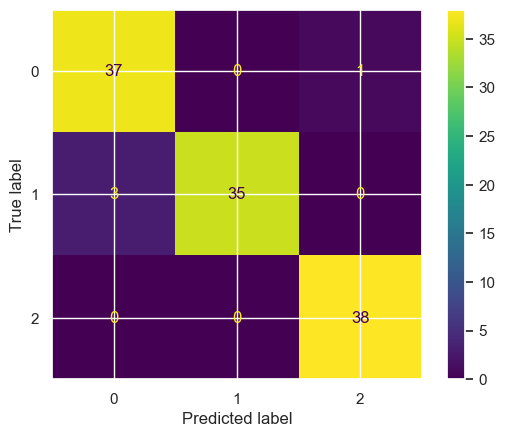

In [95]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtree1, x_test, y_test)
plt.show()

# post-prunning

In [96]:
dtree1.feature_importances_

array([0.        , 0.        , 0.        , 0.00657895, 0.062323  ,
       0.03418595, 0.44981845, 0.00528368, 0.        , 0.00779727,
       0.4340127 ])

In [97]:
pd.DataFrame(index = x.columns, data=dtree1.feature_importances_,
            columns=["Feature Importance"])

,Feature Importance
Region,0.000000
Island,0.000000
Stage,0.000000
Clutch Completion,0.006579
Culmen Length (mm),0.062323
Culmen Depth (mm),0.034186
Flipper Length (mm),0.449818
Body Mass (g),0.005284
Sex,0.000000
Delta 15 N (o/oo),0.007797


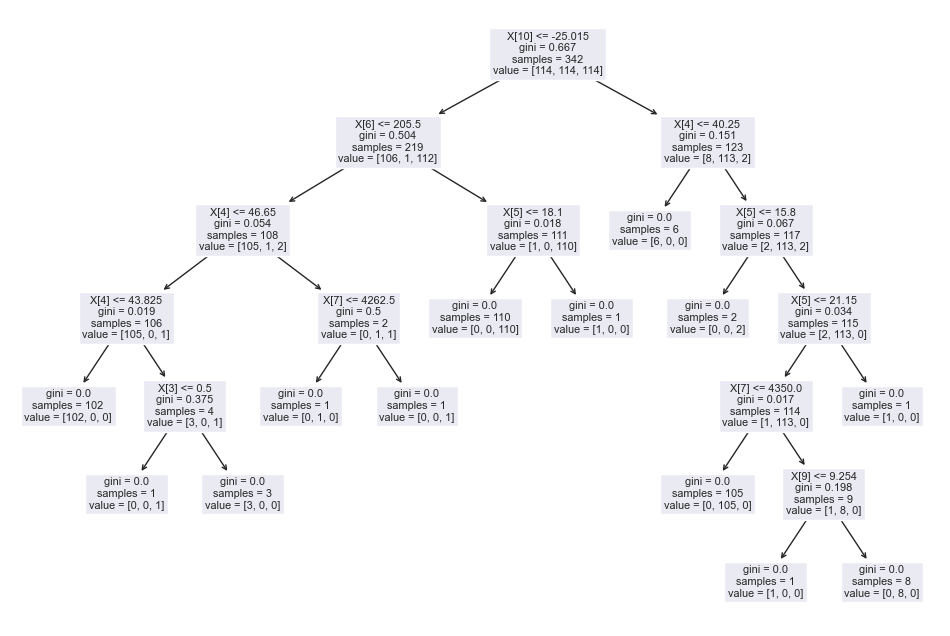

In [98]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(dtree1)
plt.show()

In [99]:
y_train.value_counts()

0    114
1    114
2    114
Name: Species, dtype: int64

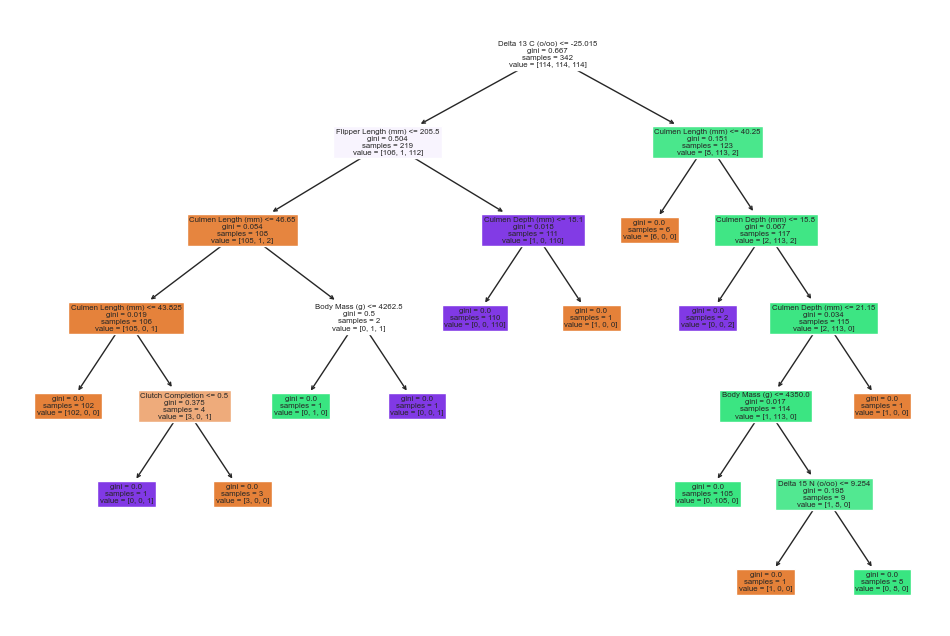

In [100]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(dtree1, filled=True, feature_names = x.columns)
plt.show()

In [101]:
# Using hyperparameter in Dtree to apply post-prunning method
prunned_tree = DecisionTreeClassifier(criterion='gini', max_depth=5)
prunned_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [102]:
# Using hyperparameter in Dtree to apply post-prunning method
prunned_tree1 = DecisionTreeClassifier(criterion='gini', max_depth=2)
prunned_tree1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [103]:
# User define function
def report_model(model):
    model_preds = model.predict(x_test)
    print(classification_report(y_test, model_preds))
    print('\n')
    print(accuracy_score(y_test, model_preds))
    print('\n')
    plt.figure(figsize=(12,8), dpi=150)
    plot_tree(model, filled=True, feature_names = x.columns)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      1.00      1.00        38
           2       0.97      1.00      0.99        38

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



0.9912280701754386




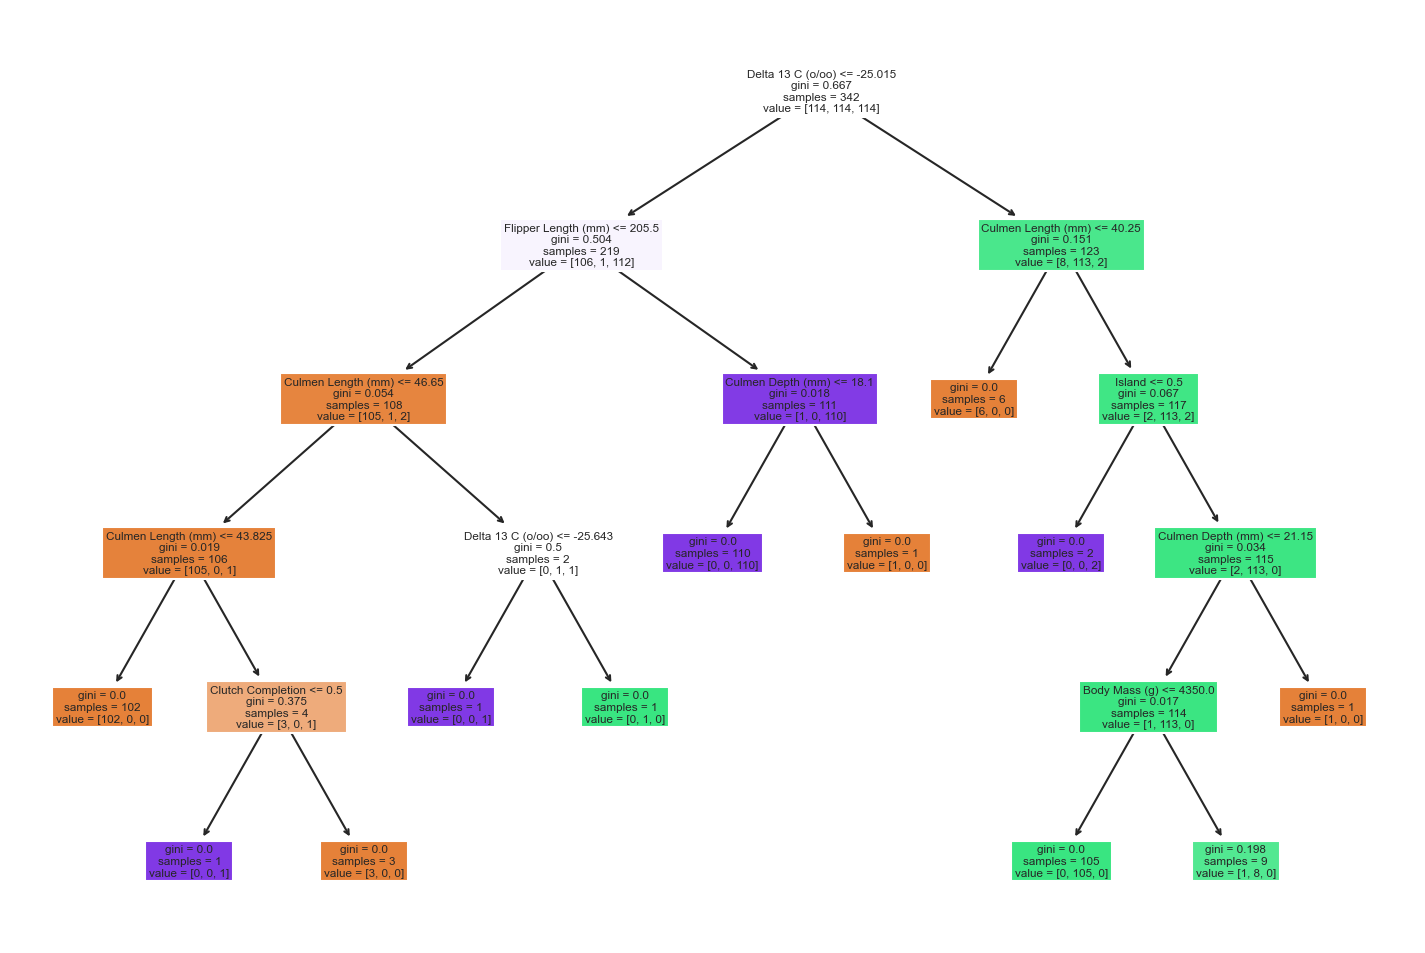

In [104]:
report_model(prunned_tree)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        38
           1       1.00      0.97      0.99        38
           2       0.97      1.00      0.99        38

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



0.9824561403508771




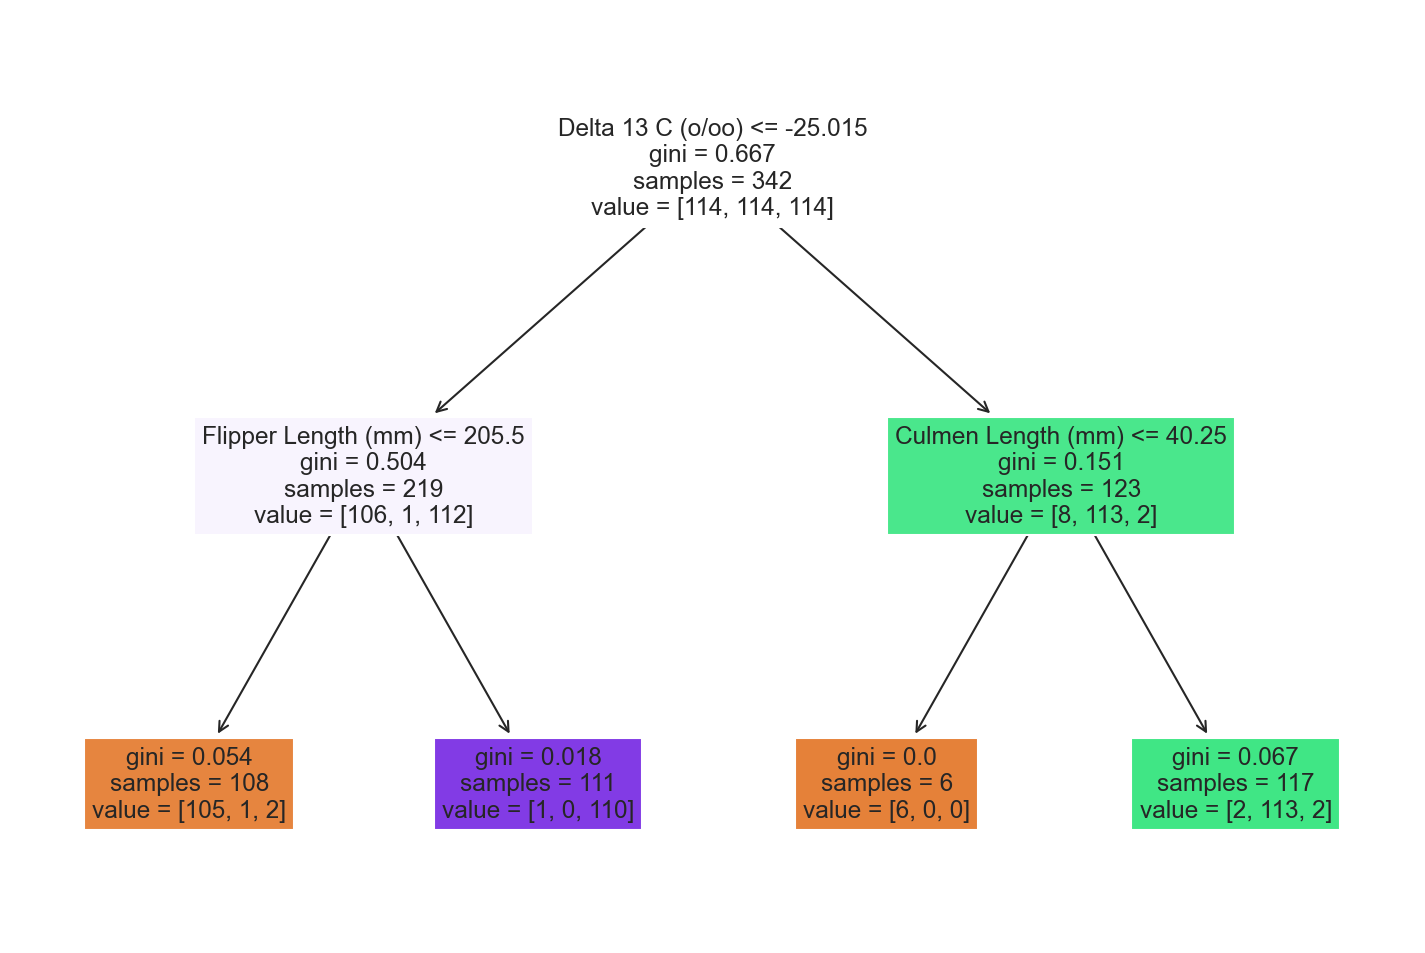

In [105]:
report_model(prunned_tree1)

# LogisticRegression 

In [106]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train, y_train)

LogisticRegression()

In [107]:
y_pred_train_logit = logit.predict(x_train)
y_pred_test_logit = logit.predict(x_test)

In [108]:
print("Train Accuracy - Logit :",accuracy_score(y_train, y_pred_train_logit))
print()
print("Test Accuracy - Logit :",accuracy_score(y_test, y_pred_test_logit))

Train Accuracy - Logit : 0.9970760233918129

Test Accuracy - Logit : 1.0


# Bagging Classifier

In [110]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier()
bagging.fit(x_train, y_train)

BaggingClassifier()

In [111]:
y_pred_bagging_train = bagging.predict(x_train)
y_pred_bagging_test = bagging.predict(x_test)

In [112]:
print("Train Accuracy - Bagging :",accuracy_score(y_train, y_pred_bagging_train))
print()
print("Test Accuracy - Bagging :",accuracy_score(y_test, y_pred_bagging_test))

Train Accuracy - Bagging : 1.0

Test Accuracy - Bagging : 0.9912280701754386


# RandomForest Classifier

In [114]:
from sklearn.ensemble import RandomForestClassifier
RF_Model = RandomForestClassifier(criterion='entropy',n_estimators=200,bootstrap=True,oob_score=True)
RF_Model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, oob_score=True)

In [115]:
y_pred_rf_train = RF_Model.predict(x_train)
y_pred_rf_test = RF_Model.predict(x_test)

In [116]:
print("Train Accuracy - RForest :",accuracy_score(y_train, y_pred_rf_train))
print()
print("Test Accuracy - RForest :",accuracy_score(y_test, y_pred_rf_test))

Train Accuracy - RForest : 1.0

Test Accuracy - RForest : 1.0


In [117]:
# Applying cross validation method
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(RF_Model, x_train, y_train, cv=10)
print(accuracy)
print()
print(accuracy.mean())
print()
print(accuracy.max())

[0.97142857 1.         1.         1.         0.97058824 1.
 1.         1.         0.94117647 0.97058824]

0.9853781512605042

1.0
